In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Центральная предельная теорема своими руками
В качестве своего распределения я взял распределение Ломакс (Парето второго рода). Выбрал я его случайно, но оказывается у этого распределения есть применение в экономике. 

Выглядит оно так:
$$f(x,c) = \frac{c}{(1+x)^{c+1}}$$

Далее в качестве $c$ я взял 3

In [286]:
my_rv = sts.lomax(3) #Создаем случайную величину с Ломакс распределением с c = 3

In [287]:
x = np.linspace(0,1.5,200)

In [288]:
cdf = my_rv.pdf(x) #Плотность вероятности нашего распределения

In [289]:
gist = my_rv.rvs(1000) #Выборка

# Построим теоретическую плотность вероятности и "эксперементальную"

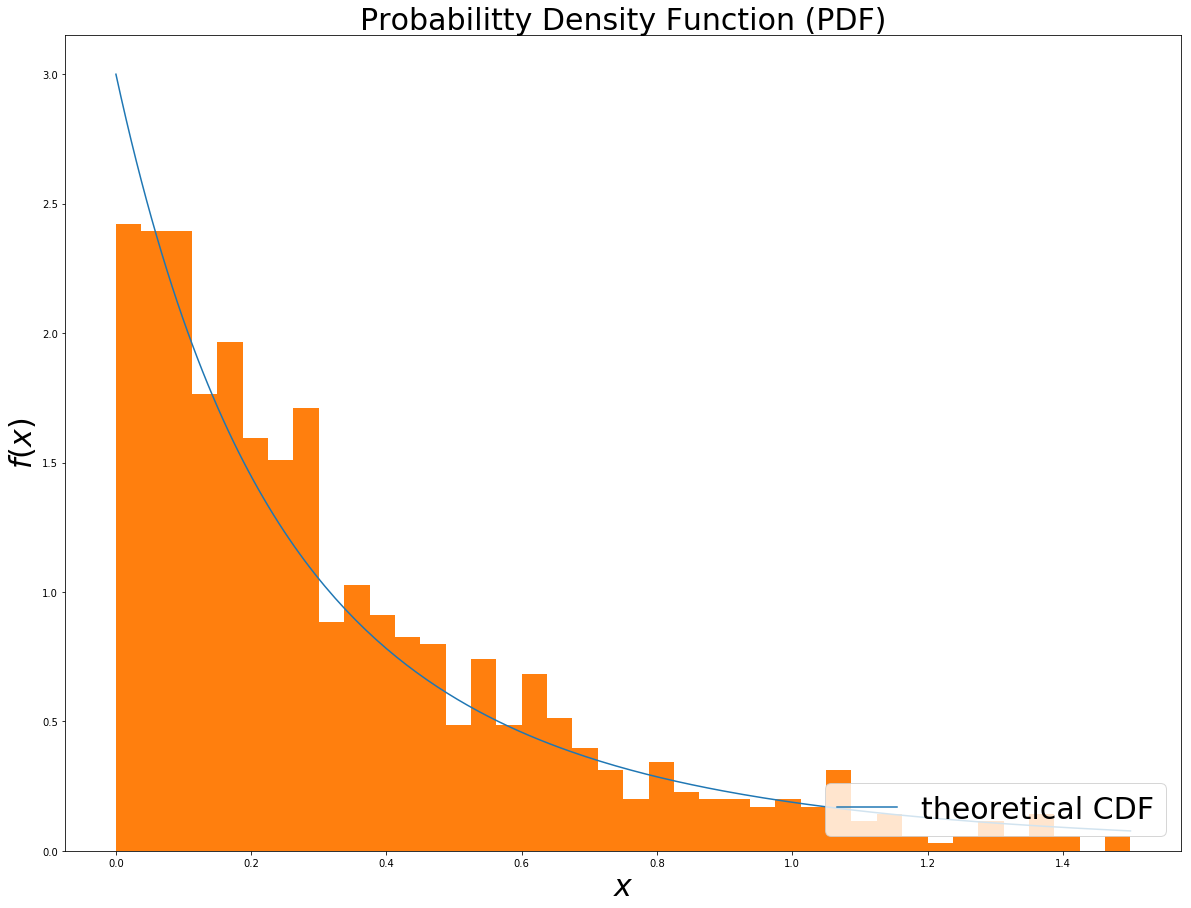

In [290]:
plt.figure(figsize = (20,15))
plt.plot(x,cdf,label = 'theoretical CDF') # Теоретическая плотность вероятности
plt.hist(gist, bins = 40, range = (x.min(),x.max()), normed = True) #Выборочная плотность вероятности
plt.legend(loc = 'lower right', prop = {'size' : 30})
plt.title('Probabilitty Density Function (PDF)',  fontsize = 30)
plt.xlabel('$x$', fontsize = 30)
plt.ylabel('$f(x)$' , fontsize = 30)
plt.show()

# Создаем функцию для печати гистограмм средних выборок объема n

In [291]:
def resh(n):
    plt.figure(figsize = (30,20)) #Задаем размер графиков
    vib = np.zeros(1000)
    if n > 100 : 
        a = n/2
    else:
        a = 50 #Это нужно для красивой столбчатой диаграммы
    for i in range(1000):
        vib[i] = np.mean(my_rv.rvs(n)) # создаем 1000 выборок объема n и считаем для каждой из них среднее, после записываем в массив
    examp_rv = sts.norm(1/2.,((3/4.)/n)**(0.5)) 
    ## Теоретическое распределение. Нормально с коэффициентами:
    ## мат ожидание 1/2
    ## Дисперсия 0.75/n
    examp = examp_rv.pdf(x)
    plt.plot(x, examp,label = 'central limit theorem prediction\n $\mu = %s$ \n $\sigma = %s$' % (0.5,round(((3/4.)/n)**(0.5),3) ))
    plt.hist(vib,bins = a, range = (x.min(),x.max()), normed = True) # Гистограмма распределения средних
    # Далее идет блок с оформлением графиков
    plt.legend(loc = 'lower right', prop = {'size' : 30})
    plt.xlabel('$x$', fontsize = 30)
    plt.ylabel('fraction of samples', fontsize = 30)
    plt.title('n = %s' % n, fontsize = 30)
    plt.show()

# Найдем мат ожидание и дисперсию моей случайно величины

Находим по определению мат ожидание:

$E(x) = \int_{-\infty}^{+\infty} x\cdot f(x)  dx= \int_0^{+\infty}\frac{3x}{(1+x)^3} dx = \frac{1}{2}$

Далее находим дисперсию:

$D(x) = \int_0^{+\infty}\frac{3(x-1/2)^2}{(1+x)^3} dx = \frac{3}{4} $



## Теоретическое предсказание распределения по центральной предельной теореме
Если мы возьмем выборку объема $n$, то по центральной предельной теореме распределение среднего $\bar{X}=\frac{1}{n}\sum_{i = 1}^{n} X_i$ стремится к нормальному с коэффициентами $\mu = E(X) = \frac{1}{2}$ и $\sigma = \sqrt{D(x)/n} = \sqrt{\frac{0.75}{n}}$. 

### Выборка размером  $n = 5$. Мат ожидание $\mu = 0.5$ и среднеквадратичное отклонение $\sigma = \sqrt{\frac{0.75}{5}} = 0.387$

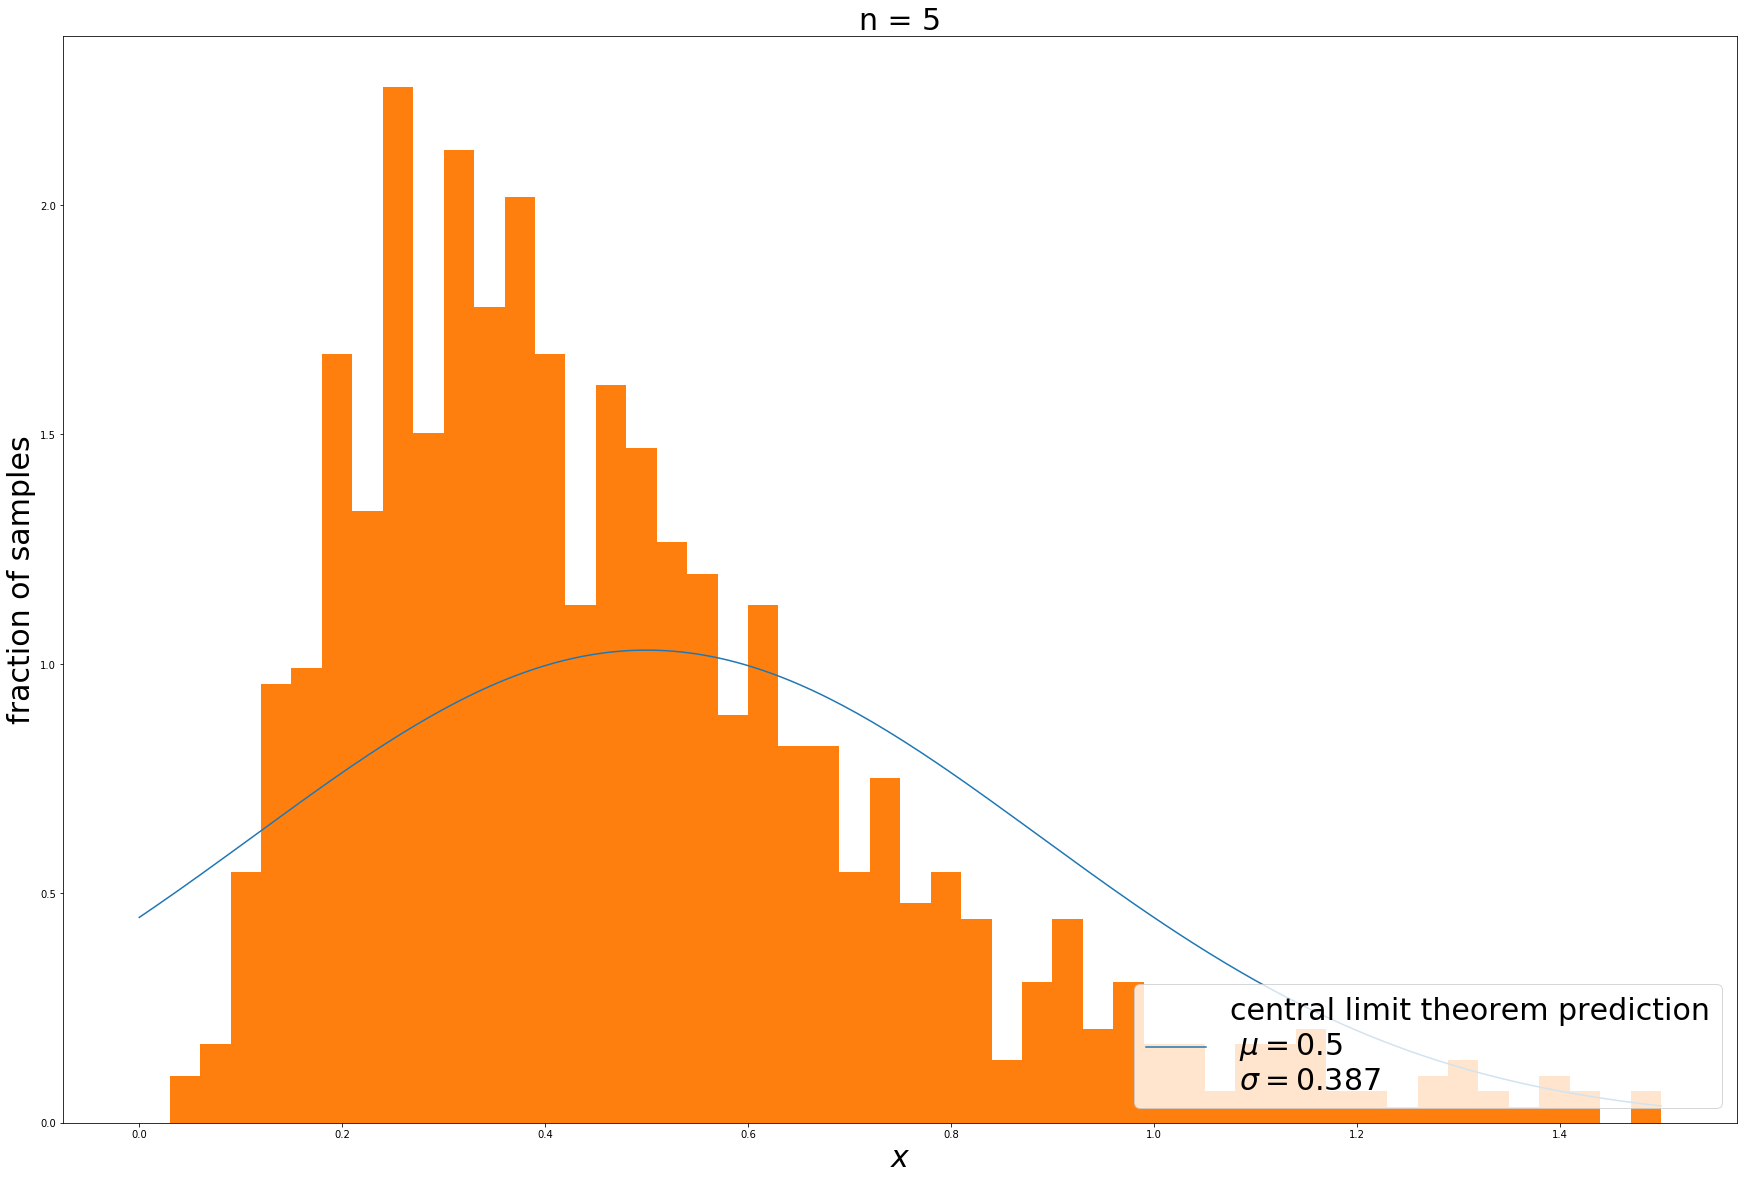

In [292]:
resh(5)

### Выборка размером  $n = 50$. Мат ожидание $\mu = 0.5$ и среднеквадратичное отклонение $\sigma = \sqrt{\frac{0.75}{50}} = 0.122$

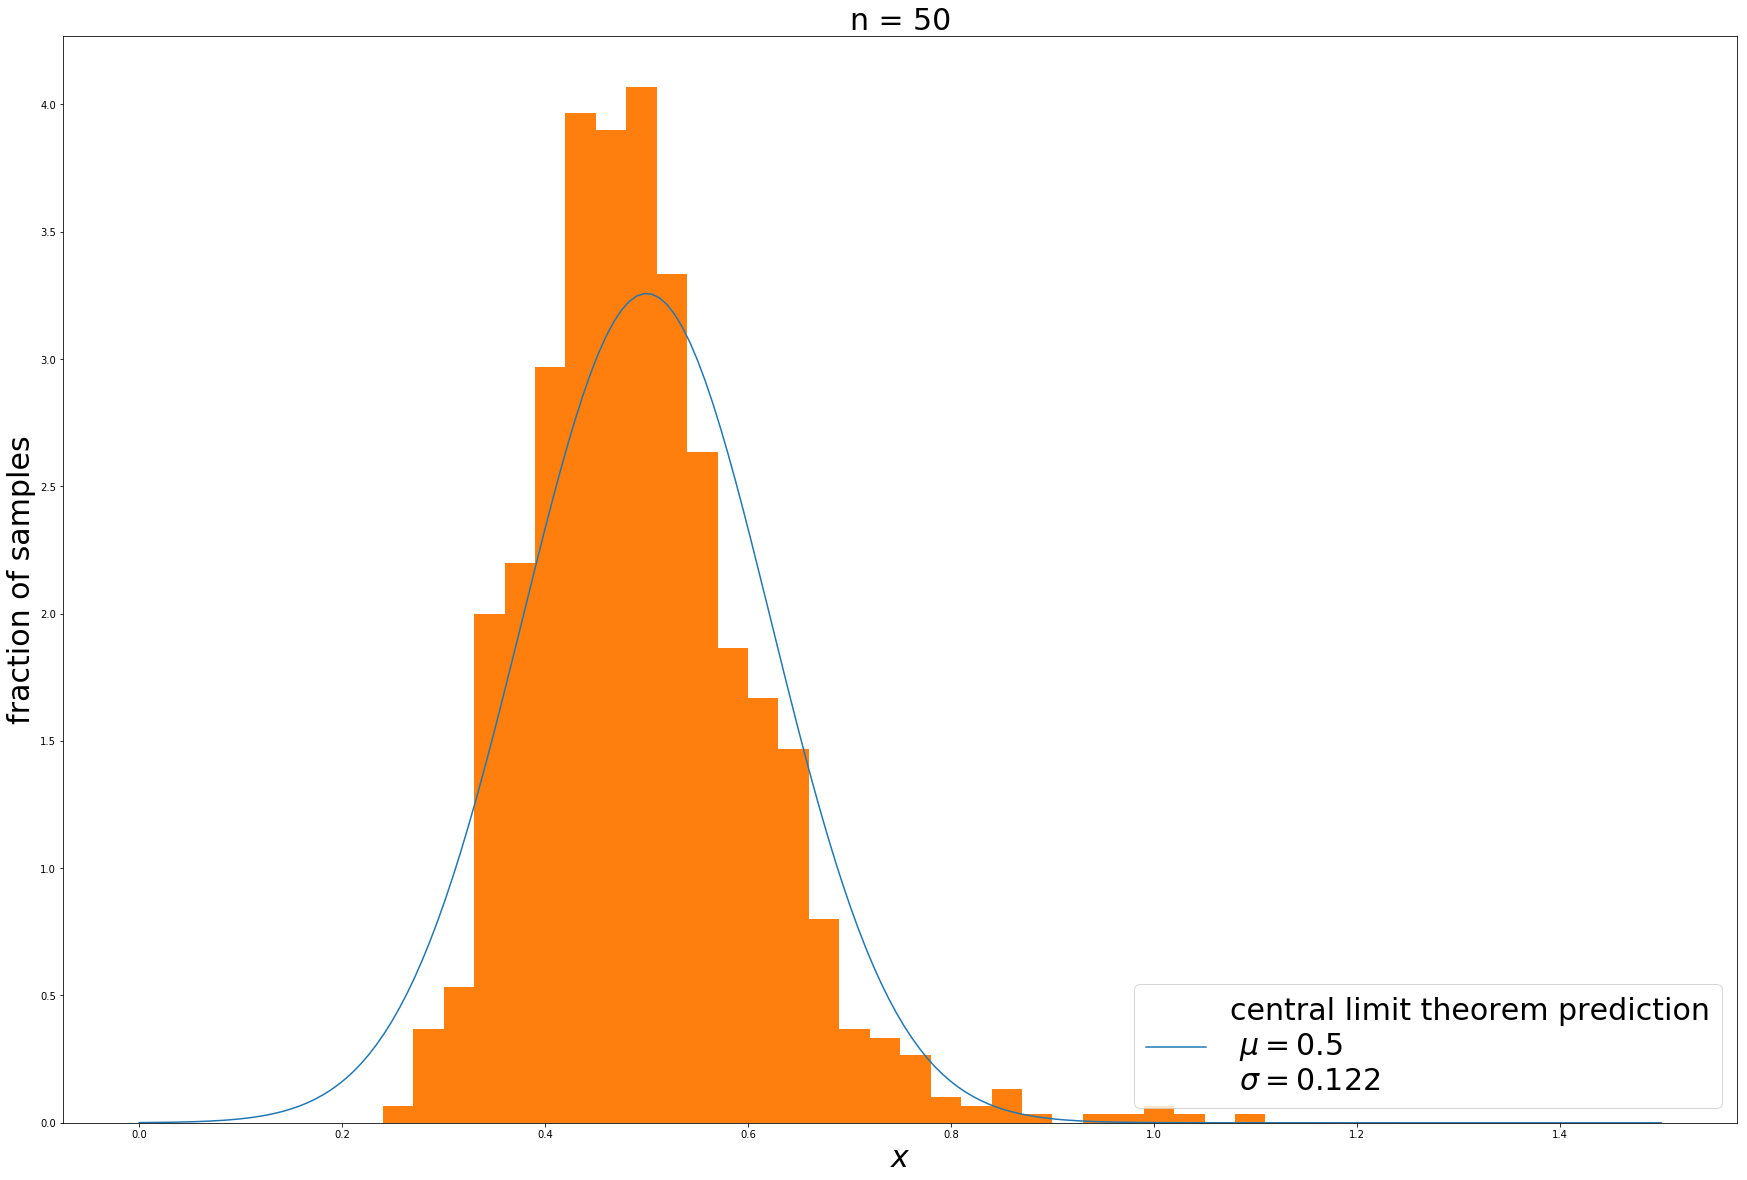

In [293]:
resh(50)

### Выборка размером  $n = 100$. Мат ожидание $\mu = 0.5$ и среднеквадратичное отклонение $\sigma = \sqrt{\frac{0.75}{100}} = 0.0866$

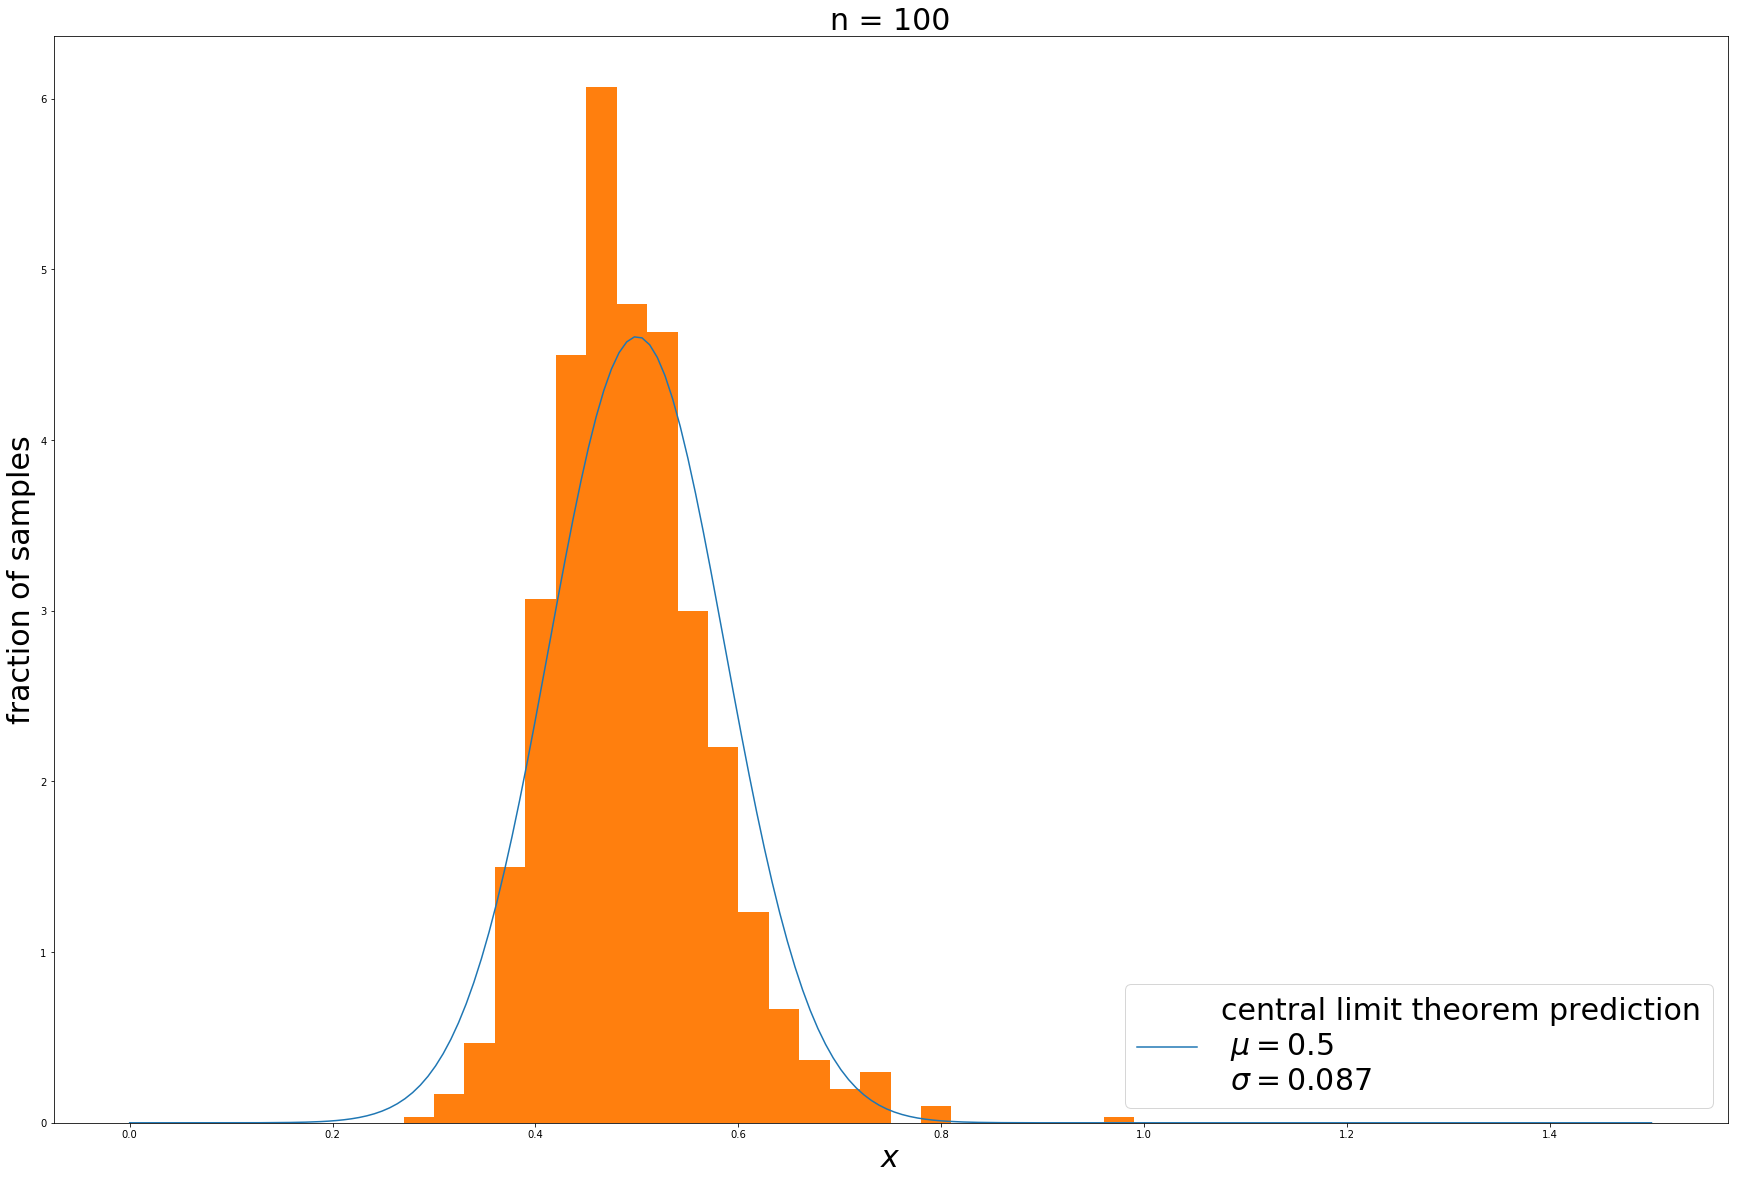

In [294]:
resh(100)

### Выборка размером  $n = 1000$. Мат ожидание $\mu = 0.5$ и среднеквадратичное отклонение $\sigma = \sqrt{\frac{0.75}{1000}} = 0.0274$

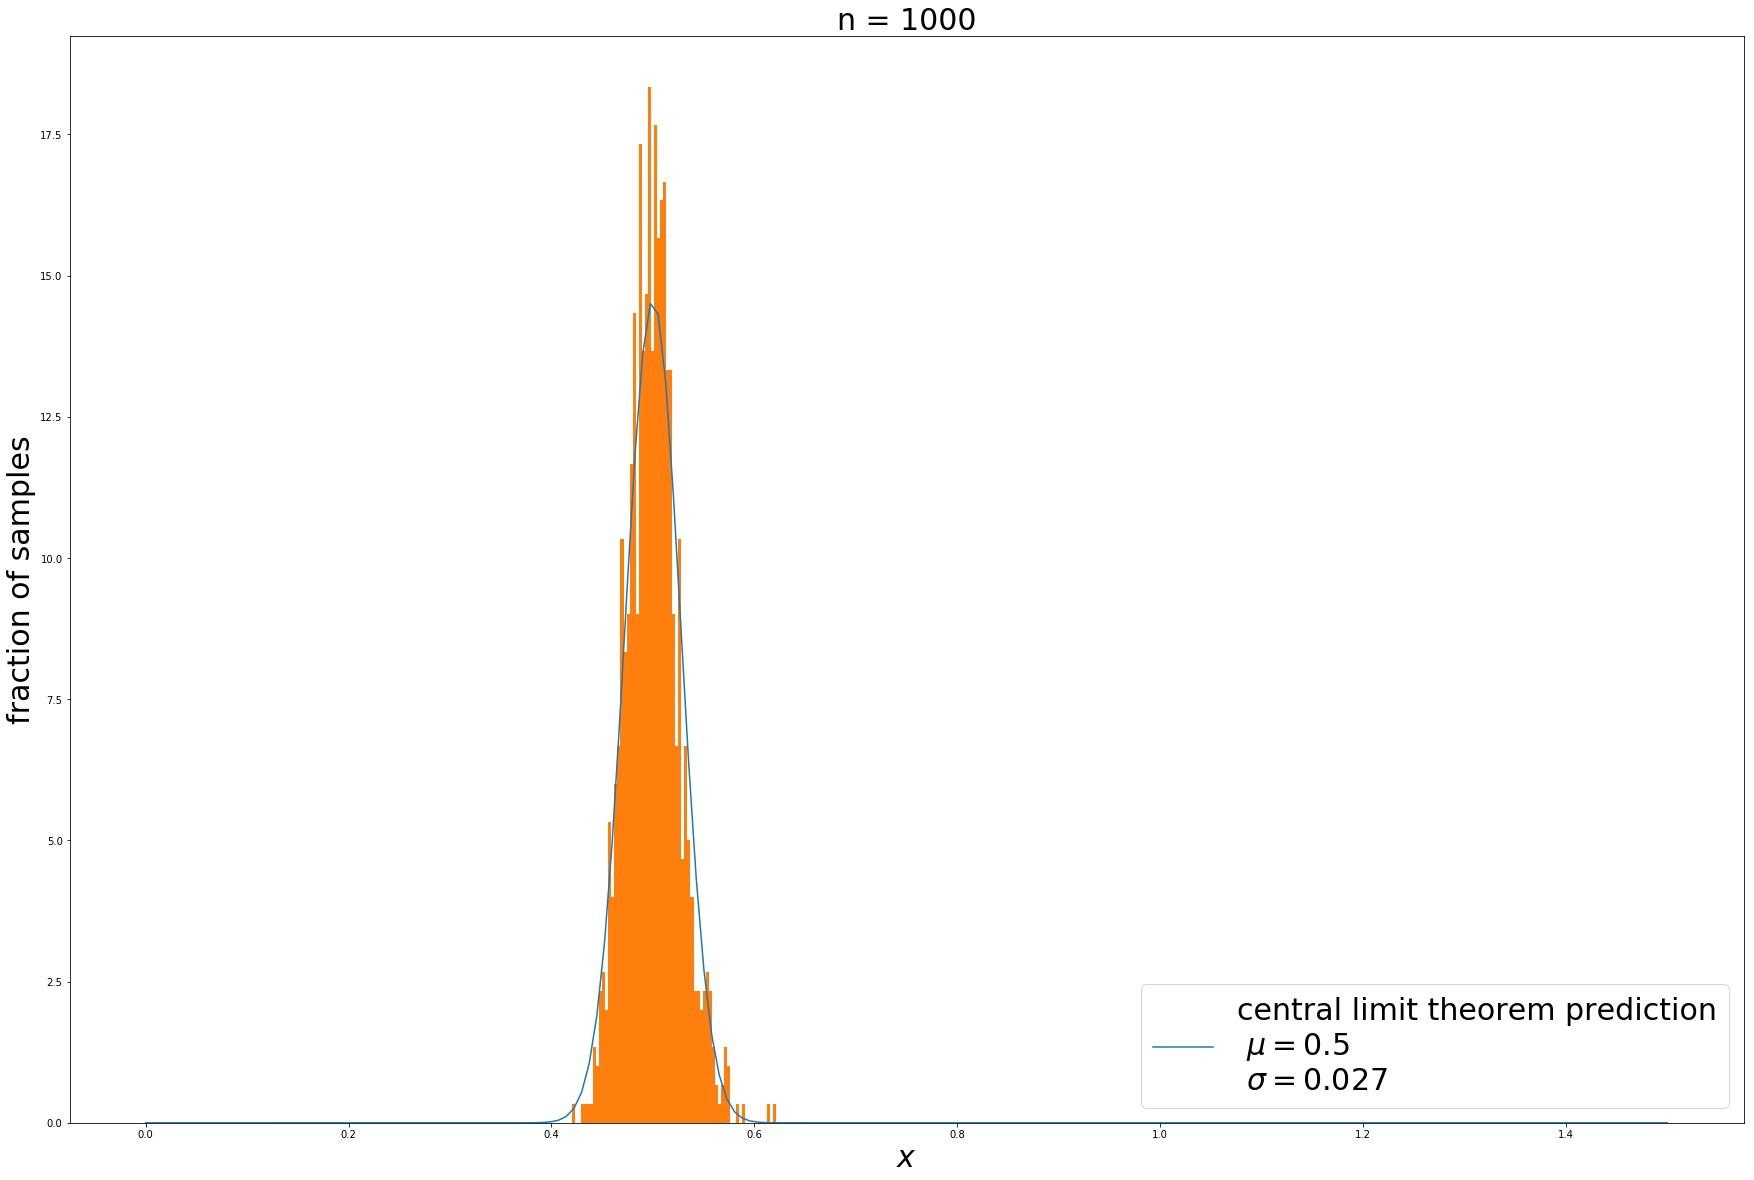

In [297]:
resh(1000)

# Вывод
Как мы могли заметить распределение при $n = 100$ уже близко к нормальному. При совсем малых $n$ (например 5) центральная предельная теорема очень плохо описывает распределение, но при больших $n$ (больше 100) номальное распределение хорошо описывает наше выборочное среднее. И погрешность приближения нормальным распределение паает с увеличением $n$. Мое распределение начинает быть похоже на нормально только при больших $n$, потому что моя изначальная случайная величина сильно "скошена" к 0, то есть максимум плотности вероятности в 0. Поэтому надо взять много чисел чтобы "оторваться" от 0